# Polynomial Regression

We will work with a csv document of a fictional insurance company. The document contains two variables: the year and the average number of claims per month. We will try to adjust our data to different regression models: first a linear one, and then several polynomial regressions.

We know that the least squares method looks for the set of curve parameters that gives us a minimum squared sum of distances to the curve (MSE). To visualize this, we will represent the cost function values for the different parameters around the predicted minimum. 

The polynomial regressions will be performed both from a written code and importing the sklearn method.

### Table of Contents

- [0. Loading the Dataset](#0.-Loading-the-Dataset)
- [1. Linear Regression](#1.-Linear-Regression)
- [2. Visualizing The MSE Minimum](#2.-Visualizing-the-MSE-Minimum)
- [3. Polynomial Regression](#3.-Polynomial-Regression)
- [4. Polynomial Regression - sklearn.](#4.-Polynomial-Regression---sklearn.)

## 0. Loading the Dataset

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from numpy   import genfromtxt
import seaborn as sns
sns.set_style("white")

import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = np.genfromtxt('Datasets/Insurance_Claims.csv',delimiter=',',skip_header=1)
print(data)
print()

[[  5.    44.33]
 [  6.    50.75]
 [  7.    60.27]
 [  8.    63.53]
 [  9.    65.28]
 [ 10.    65.37]
 [ 11.    66.94]
 [ 12.    77.47]
 [ 13.    94.43]
 [ 14.   113.11]]



## 1. Linear Regression

The intercept, i.e. w0 = 11.357393939393951
The slope, i.e. w1 = 6.188484848484847


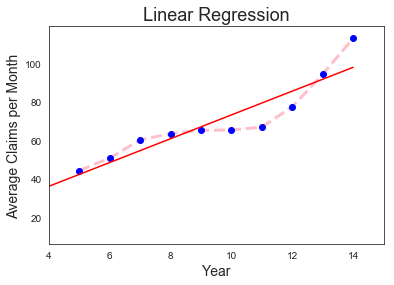

In [28]:
X=data[:,0:1]    #We do it in this way so we have dimensions (N,1), not (N,0)
Y=data[:,1:2]
x=np.array(X)
y=np.array(Y)

plt.plot(X,Y,'--',lw=3,c='pink',zorder=1)
plt.scatter(X,Y,c='b',zorder=2,alpha=1)
plt.title('Linear Regression',fontsize=18)
plt.xlabel('Year', size=14)
plt.ylabel('Average Claims per Month', size=14)
plt.xlim(4,15)

L = linear_model.LinearRegression().fit(X,Y)
w0=L.intercept_[0]     #Data given as array - we select the element of the mono/multidimensional array
w1=L.coef_[0,0]
print('The intercept, i.e. w0 =',w0)
print('The slope, i.e. w1 =',w1)
f=lambda k: w1*k+w0
s=np.arange(15)
plt.plot(s,f(s),c='r')
plt.show()
print()


## 2. Visualizing the MSE Minimum

We will represent the cost function around the minimum to prove that it actually is a minimum:
* In 2D plots, for each one of the parameters (w0 and w1)
* In a 3D plot, for both of the parameters

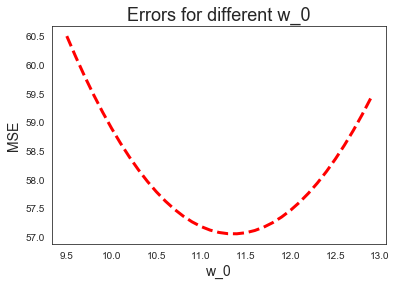

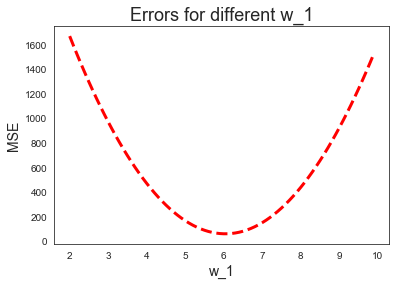

In [29]:
wx0=np.arange(9.5,13,0.1)
E_w0=[]
for w in wx0:
  w0=w
  Err0=mean_squared_error(Y,f(X))
  E_w0.append(Err0)
plt.plot(wx0,E_w0,'--',c='r',lw=3)
plt.title('Errors for different w_0',fontsize=18)
plt.ylabel('MSE', fontsize=14)
plt.xlabel('w_0', fontsize=14)
plt.show()

wx1=np.arange(2,10,0.1)
E_w1=[]
for w in wx1:
  w1=w
  Err1=mean_squared_error(Y,f(X))
  E_w1.append(Err1)
plt.plot(wx1,E_w1,'--',c='r',lw=3)
plt.title('Errors for different w_1',fontsize=18)
plt.ylabel('MSE', fontsize=14)
plt.xlabel('w_1', fontsize=14)
plt.show()

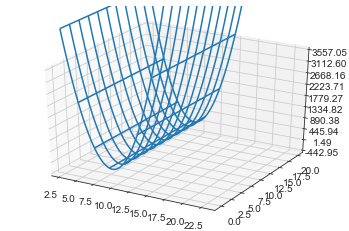

In [30]:
rgs = linear_model.LinearRegression()
rgs.fit(X, Y)
mse = mean_squared_error(Y, rgs.predict(X))

def show_3d_graph():
    w1_offset = 10
    w0_offset = 10
    mse_offset = 2000
  
    lns_w1 = np.linspace(w1 -w1_offset, w1 + w1_offset, 100)
    lns_w0 = np.linspace(w0 -w0_offset, w0 + w0_offset, 100)

    w0_X, w1_Y = np.meshgrid(lns_w0, lns_w1)
    Z_ = np.matrix([mean_squared_error(Y, X*w1_ + w0_) for (w0_, w1_) in zip(lns_w0, lns_w1)] )

    fig = plt.figure()
    ax = fig.gca(projection='3d')
  
    # Plot the surface.
    '''surf = ax.plot_surface(w0_X, w1_Y, Z_, cmap=cm.coolwarm,
                              linewidth=0, antialiased=False)'''
  
    ax.plot_wireframe(w0_X, w1_Y, Z_, rstride=10, cstride=10)
  
    # Customize the z axis.
    ax.set_zlim(mse - mse_offset * 0.25 , mse + mse_offset * 1.75)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    plt.show()
    
show_3d_graph()
print()

## 3. Polynomial Regression

As it can be seen in Section 2, a linear regression is not enough to reproduce the nature of our data. We need to use a polynomial regression. We will implement it first *by hand*, and then in the following section by using the sklearn library.

Recall that least squared estimate is found for a set of parameters W such that:

 $W = (X^TX)^{-1}X^TY$

Consider the variables $x_1$ and $x_2$. If we introduce the data of each variable in columns, the matrix of our data X will be:

$
  X=
  \left[ {\begin{array}{cc}
   x_{11} & x_{21}\\
   x_{12} & x_{22}\\
  \end{array} } \right]
$

Then, for a certain degree of polynomial (let's say 3) our X will be:

$
  X=
  \left[ {\begin{array}{cc}
   1 & x_{11}  & x_{12} & x_{11}^2 & x_{12}^2 & x_{11}^3 & x_{12}^3 \\
   1 & x_{21} & x_{22} & x_{21}^2 & x_{22}^2 & x_{21}^3 & x_{22}^3 \\
  \end{array} } \right]
$

We will perform this procedure and calculate the parameters for polynomial regressions from degree 1 to 6.

In [31]:
M=np.array([[1,3],[2,4]])
o=np.ones((len(M),1))
print('Our initial matrix X is:')
print(M)
print()

Mf= np.hstack((o,M))

g=input('Please, insert the degree of the polynomial: ',)
g=int(g)
g=g+1
for n in range(2,g):
  Ms=M**n
  Mf=np.hstack((Mf,Ms))
  
print('Our X matrix will then be:')
print(Mf)

Our initial matrix X is:
[[1 3]
 [2 4]]

Please, insert the degree of the polynomial: 6
Our X matrix will then be:
[[1.000e+00 1.000e+00 3.000e+00 1.000e+00 9.000e+00 1.000e+00 2.700e+01
  1.000e+00 8.100e+01 1.000e+00 2.430e+02 1.000e+00 7.290e+02]
 [1.000e+00 2.000e+00 4.000e+00 4.000e+00 1.600e+01 8.000e+00 6.400e+01
  1.600e+01 2.560e+02 3.200e+01 1.024e+03 6.400e+01 4.096e+03]]



Maximum degree of polynomial: 6



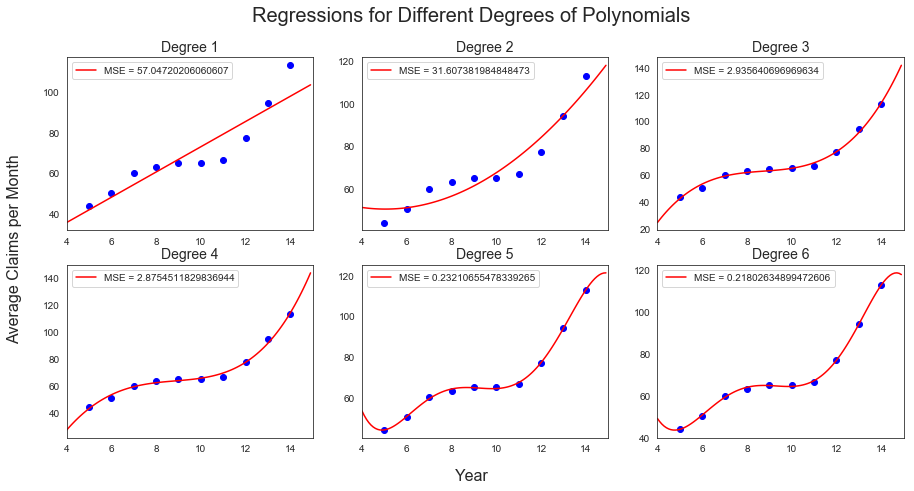

In [32]:
o=np.ones((len(X),1))

#Define degree of polynomial
g=input('Maximum degree of polynomial: ',)
print()
g=int(g)
 
fig=plt.figure(figsize=(15,7))

#Calculamos la matriz Xf de potencias concatenada
for p in range(1,g+1):
  Xf=o
  for n in range(1,p+1):
    Xs=X**n
    Xf=np.hstack((Xf,Xs)) 
    
  #Invertimos la matriz Xf y calculamos la matriz de coeficientes W
  Xinv= np.linalg.inv(Xf.T @ Xf)
  W=Xinv @ Xf.T @ Y
  
  #Calculamos la regresion en base
  def predictor(w,z):
    ff=0
    for i in range(0,p+1):
      h =  w[i]*z**i
      ff += h
    return ff
  
  err=mean_squared_error(Y,predictor(W,X))  
  "%.2f" % err
 
  ax1 = fig.add_subplot(2,g/2,p)
  xx=np.arange(4,15,0.1)
  plt.title('Degree '+str(p), fontsize=14)
  plt.scatter(X,Y,c='b',zorder=2,alpha=1)
  plt.plot(xx, predictor(W,xx), c='r', label = 'MSE = ' + str(err))
  plt.xlim(4,15)
  plt.legend()

  
plt.suptitle('Regressions for Different Degrees of Polynomials',fontsize=20)
fig.text(0.5, 0.04, 'Year', ha='center',fontsize=16)
fig.text(0.07, 0.5, 'Average Claims per Month', va='center', rotation='vertical',fontsize=16)
plt.show()
print()

## 4. Polynomial Regression - sklearn.

We simply perform the polynomial regression method as in the previous section, but now, using the sklearn library. The MSE value is also shown.

MSE  1 degree = 57.04720206060606
MSE  2 degree = 31.6073819848485
MSE  3 degree = 2.9356406969696573
MSE  4 degree = 2.8754511829837006
MSE  5 degree = 0.23210655477861045
MSE  6 degree = 0.2180263123544926


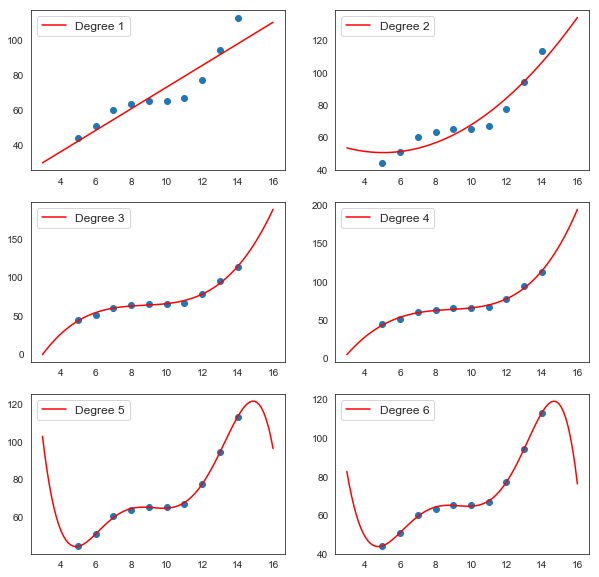

In [33]:
colors = ['red', 'purple', 'green', 'blue', 'yellow', 'orange']

plt.figure(figsize=(10,10))
for degree in range(1, 7):
  poly = PolynomialFeatures(degree=degree, interaction_only=False)

  X_ = poly.fit_transform(X)

  lg = linear_model.LinearRegression()
  lg.fit(X_, Y)

  lns = np.linspace(np.min(X) - 2, np.max(X) + 2, 100).reshape(100,1)
  X_for_test = poly.fit_transform(lns)
  
  plt.subplot(3, 2, degree)
  plt.scatter(X, Y)
  plt.plot(lns, lg.predict(X_for_test), alpha=1, label="Degree " + str(degree), c='r')
  print("MSE ", degree, "degree =",  mean_squared_error(Y, lg.predict(X_))  )
  
  plt.legend(fontsize=12)

  
plt.show()